# Generating FoGSM data

In [1]:
from fogsm import FoGSMModel, FoGSMVAE
from _imports import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Set the random seed for reproducibility
torch.manual_seed(0)

# Example usage
length_scale_feature = 0.5
length_scale_amplitude = 1.2
kappa = 1.0
grid_size = 10
frequency = 0.9
sigma = 0.1

thetas = torch.linspace(0, 2 * np.pi, 8)  # 8 orientations from 0 to 2*pi

# Creating an instance of the model
model = FoGSMModel(thetas,length_scale_feature, length_scale_amplitude, kappa, jitter = 1e-4,grid_size=grid_size, frequency=frequency, sigma=sigma)

/Users/khushu/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391836761/work/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Users/khushu/Desktop/IIB_Project FoGSM 2dSSN/GSM/fogsm.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta1 = torch.tensor(theta1)
/Users/khushu/Desktop/IIB_Project FoGSM 2dSSN/GSM/fogsm.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta2 = torch.tensor(theta2)


In [3]:
# Sample from the GP
combined_fields2, features = model.samples()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


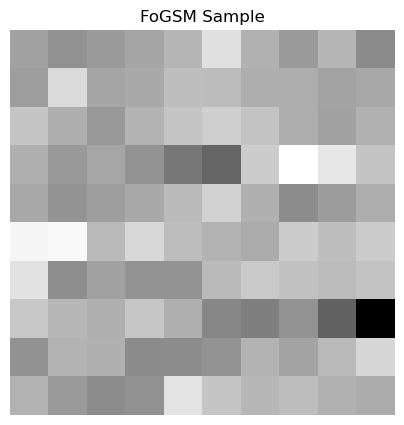

In [4]:
# Visualise the generated image
model.visualise(combined_fields2)

Generate or fetch $I$ (FoGSM-generated samples).
Pass $I$ through the encoder to get $\mathbf{g}$ and $\mathbf{A}$ distribution parameters.
Sample $\mathbf{g}$ and $\mathbf{A}$ using the reparameterisation trick.
Compute the ELBO loss, combining the reconstruction loss (using $\mathbf{g}$ and $\mathbf{A}$ samples) and the KL divergence terms.
Backpropagate the loss to update the encoder (and any other components involved in the loss computation).


In [5]:
I = combined_fields2
    
# Define the dimensionality
input_dim = I.shape[1]  
hidden_dims = [I.shape[1], I.shape[1]] 
output_dim = I.shape[1] 
g_dim = 10
A_dim = 10
    
# Create the FoGSM VAE
fogsm_vae = FoGSMVAE(input_dim, hidden_dims, output_dim, g_dim, A_dim)
    
# Define the optimiser
optimiser = torch.optim.Adam(fogsm_vae.parameters(), lr=1e-2)
    
# Train the VAE
num_epochs = 10
elbo_values = fogsm_vae.train(num_epochs=num_epochs, I=I, optimiser=optimiser,print_every=1)

# Plot the ELBO values as a function of epoch
plt.plot(range(1, num_epochs + 1), elbo_values)
plt.xlabel('Epoch')
plt.ylabel('NELBO')
plt.title('NELBO as a Function of Epoch')
plt.grid(True)
plt.show()

# Save the trained model
torch.save(fogsm_vae.state_dict(), 'fogsm_vae.pt')

Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

torch.Size([10, 55])
Building lower triangular matrix for Cholesky parameter
chol:  torch.Size([10, 55])
g_dim 10
num_g_points 10


L:  torch.Size([10, 10])
tril_indices:  torch.Size([2, 55])
Building lower triangular matrix 1/10


Cholesky parameter: tensor([-1.5832,  2.4761, -0.1364, -0.0149,  2.2214, -1.1702, -3.3456,  2.6273,
        -1.8480,  3.7134, -0.6117,  1.7059, -1.0002,  0.4548, -0.6180,  1.1167,
         1.5263, -2.8560,  2.2091,  0.0308,  0.4911,  2.6211, -0.0373, -2.6718,
        -0.9583, -2.2562, -3.4144,  2.3586, -0.6256, -2.9589,  1.6292, -4.9639,
        -3.2235,  2.2338, -1.1698,  0.6568, -3.5426, -0.7530, -4.1247, -0.7171,
         0.2480,  3.2542,  2.6785, -1.8175, -2.2932, -2.3047,  1.9112, -1.1214,
         0.4466,  1.7157,  4.0021,  1.4744,  0.2242,  0.1402, -0.3223],
       grad_fn=<SelectBackward0>)
L:  torch.Size([10, 10])
tril_indices:  torch.Size([2, 55])
Building lower triangular matrix 2/10
Cholesky parameter: tensor([-0.2657,  0.4433,  0.2052,  0.2340,  0.0091, -0.4256, -0.7957,  0.3651,
        -0.8456,  0.5474, -0.3054,  0.1351, -0.2733,  0.0065, -0.5361,  0.5374,
         0.5016, -0.3571,  0.1579,  0.0702,  0.0307,  0.0404, -0.1476, -0.3357,
        -0.2484, -0.2032, -0.4881,  

Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

Building lower triangular matrix 7/10


                                                   
                                                   
Training:   0%|          | 0/10 [00:00<?, ?epoch/s]

Cholesky parameter: tensor([-1.1836,  1.6425,  0.0800,  0.2774,  1.6028, -1.0599, -3.0923,  2.0154,
        -1.0812,  2.7588, -1.5367,  1.7867, -1.3026,  0.1567, -1.0944,  1.0930,
         0.9134, -1.8008,  2.4647, -0.4947, -0.0729,  1.5023, -0.0885, -2.3359,
        -0.1608, -2.2336, -2.2684,  2.3569,  0.1296, -2.3153,  0.8629, -3.8423,
        -2.8938,  1.6047, -0.4733,  0.2088, -3.0903, -1.3229, -3.6656,  0.4046,
        -0.2516,  2.2924,  2.6795, -0.4595, -1.6306, -1.8656,  0.5009, -0.2015,
         0.7928,  1.0286,  3.1402,  1.1953,  0.2890,  0.4185, -0.5431],
       grad_fn=<SelectBackward0>)
L:  torch.Size([10, 10])
tril_indices:  torch.Size([2, 55])
Building lower triangular matrix 8/10


                                                   
                                                   
                                                   
                                                   
                                                   
100%|██████████| 10/10 [00:00<00:00, 34.19it/s]h/s]
/Users/khushu/Desktop/IIB_Project FoGSM 2dSSN/GSM/fogsm.py:287: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalisation_constant = 0.5 * torch.log(2 * torch.pi * torch.tensor(sigma)**2) * torch.numel(original_I)


Cholesky parameter: tensor([-1.2962,  0.3690,  0.1828,  0.4892, -0.7423, -0.3383, -1.0000, -0.2614,
        -0.3313,  0.4443, -0.4826,  0.6093, -0.6928,  0.3772, -0.2358, -0.1464,
         0.3685,  0.3564,  0.6800,  0.0986,  0.6628,  0.2659, -0.8357, -1.4270,
        -0.0647, -0.8198, -0.3971, -0.4530, -0.4720, -0.5203,  0.0551, -1.0787,
        -0.6207,  0.3016,  0.6596,  0.8638, -1.0439, -1.2376, -0.3454,  0.2375,
        -0.2097,  0.3696,  0.9237,  0.3513,  0.3119, -1.1121, -0.3967, -1.4345,
         0.4539,  1.4656,  0.2098,  0.0541, -0.5047, -0.1712, -0.2479],
       grad_fn=<SelectBackward0>)
L:  torch.Size([10, 10])
tril_indices:  torch.Size([2, 55])
Building lower triangular matrix 9/10
Cholesky parameter: tensor([-0.5654,  0.5679,  0.3737,  0.3179, -0.0689, -0.4307, -1.2529,  0.3796,
        -1.7157,  1.5667, -0.4492,  0.6565, -0.4974,  0.4113, -1.3041,  0.6032,
         1.4289, -0.9748,  0.0766,  0.3314,  0.3337,  0.1615, -0.0990, -1.1363,
        -0.4431,  0.3236, -1.4423,  

Training:   0%|          | 0/10 [00:00<?, ?epoch/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (800x800 and 10x10)

In [ ]:
# Plot the ELBO values as a function of epoch
plt.plot(range(1, num_epochs + 1), elbo_values)
plt.xlabel('Epoch')
plt.ylabel('NELBO')
plt.title('NELBO as a Function of Epoch')
plt.grid(True)
plt.show()

NameError: name 'elbo_values' is not defined

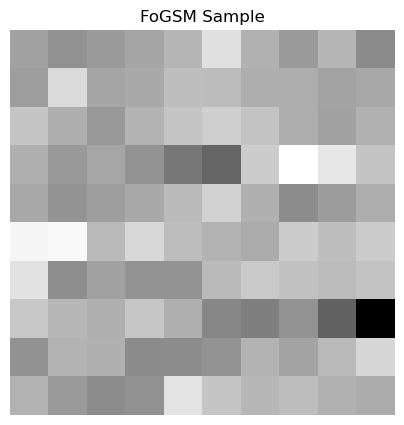

In [ ]:
model.visualise(combined_fields2)